In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())

import numpy as np
import pandas as pd
from syn_model import *
%matplotlib inline

## Load and clean sample Data 

In [18]:
_NYTimes_local_path = "../data/covid/NYTimes/us-states.csv"
states = pd.read_csv(_NYTimes_local_path)[1:]
cases = states.pivot(index='date', columns='state', values='cases')
deaths = states.pivot(index='date', columns='state', values='deaths')
cases = cases.fillna(0).iloc[60:]
deaths = deaths.fillna(0)

## Define the parameters and models

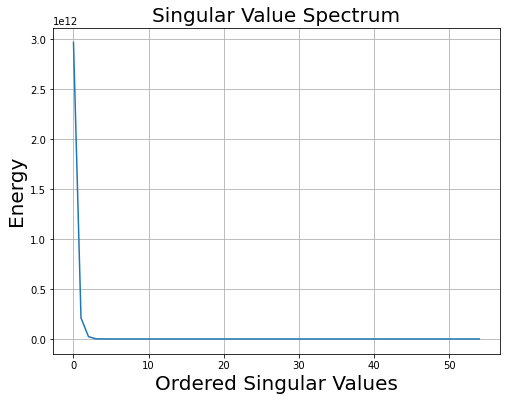

In [43]:
#Determine the singular value. It seems that 3 might be enough
U, s, Vh = model.svd_spectrum(show_plot = True)

In [20]:
target = 'Florida' #Treatment states
donors = list(cases.columns) #donorpools include all other state, 
                             #this is just set for presentation, and not that rigiously chosen
donors.remove(target)
singVals = 3
low_thresh = 100 #This represents the the pre-intervention period, which is the first 100 date of the dataframe
high_thresh = 200 #This is the total time span that we are looking at

model = syn_model(target, singVals, [cases], high_thresh, low_thresh, otherStates = donors) #Create a syn_model object
model.fit_model()#Fit the model

## Some supporting functions in the class

### Plot the digram

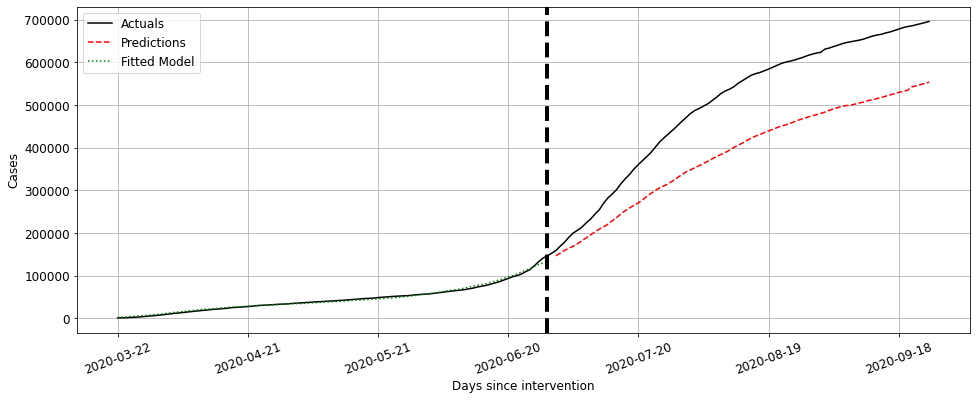

In [31]:
model.plot()

### Plot the diagram with donors' normalized weights

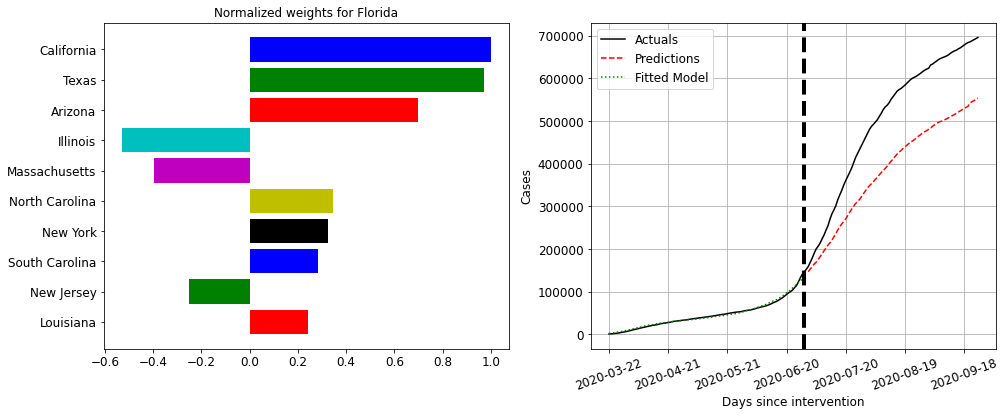

In [30]:
#donors_num will select the states with largest n absolute weight
model.plot(show_donors = True, donors_num = 10)

### Parameters that might be useful to know

In [25]:
print("Training error is %4.2f \nTesting error is %4.2f"%(model.train_err, model.test_err))

Training error is 8854856.36 
Testing error is 15682676841.10


### RI score for the target state

In [28]:
print("RI Score is %s"%(model.find_ri()))

RI Score is 1771.0820151636244


### Permutation distribution Diagram

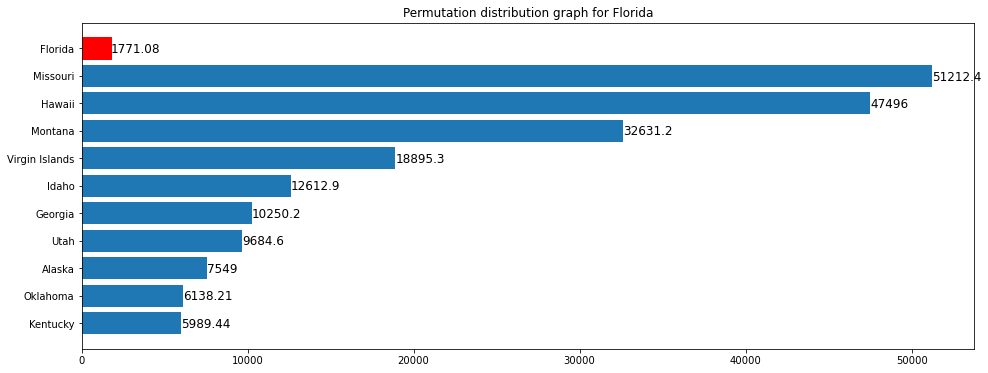

In [37]:
ri_dict = model.permutation_distribution(show_graph = True)

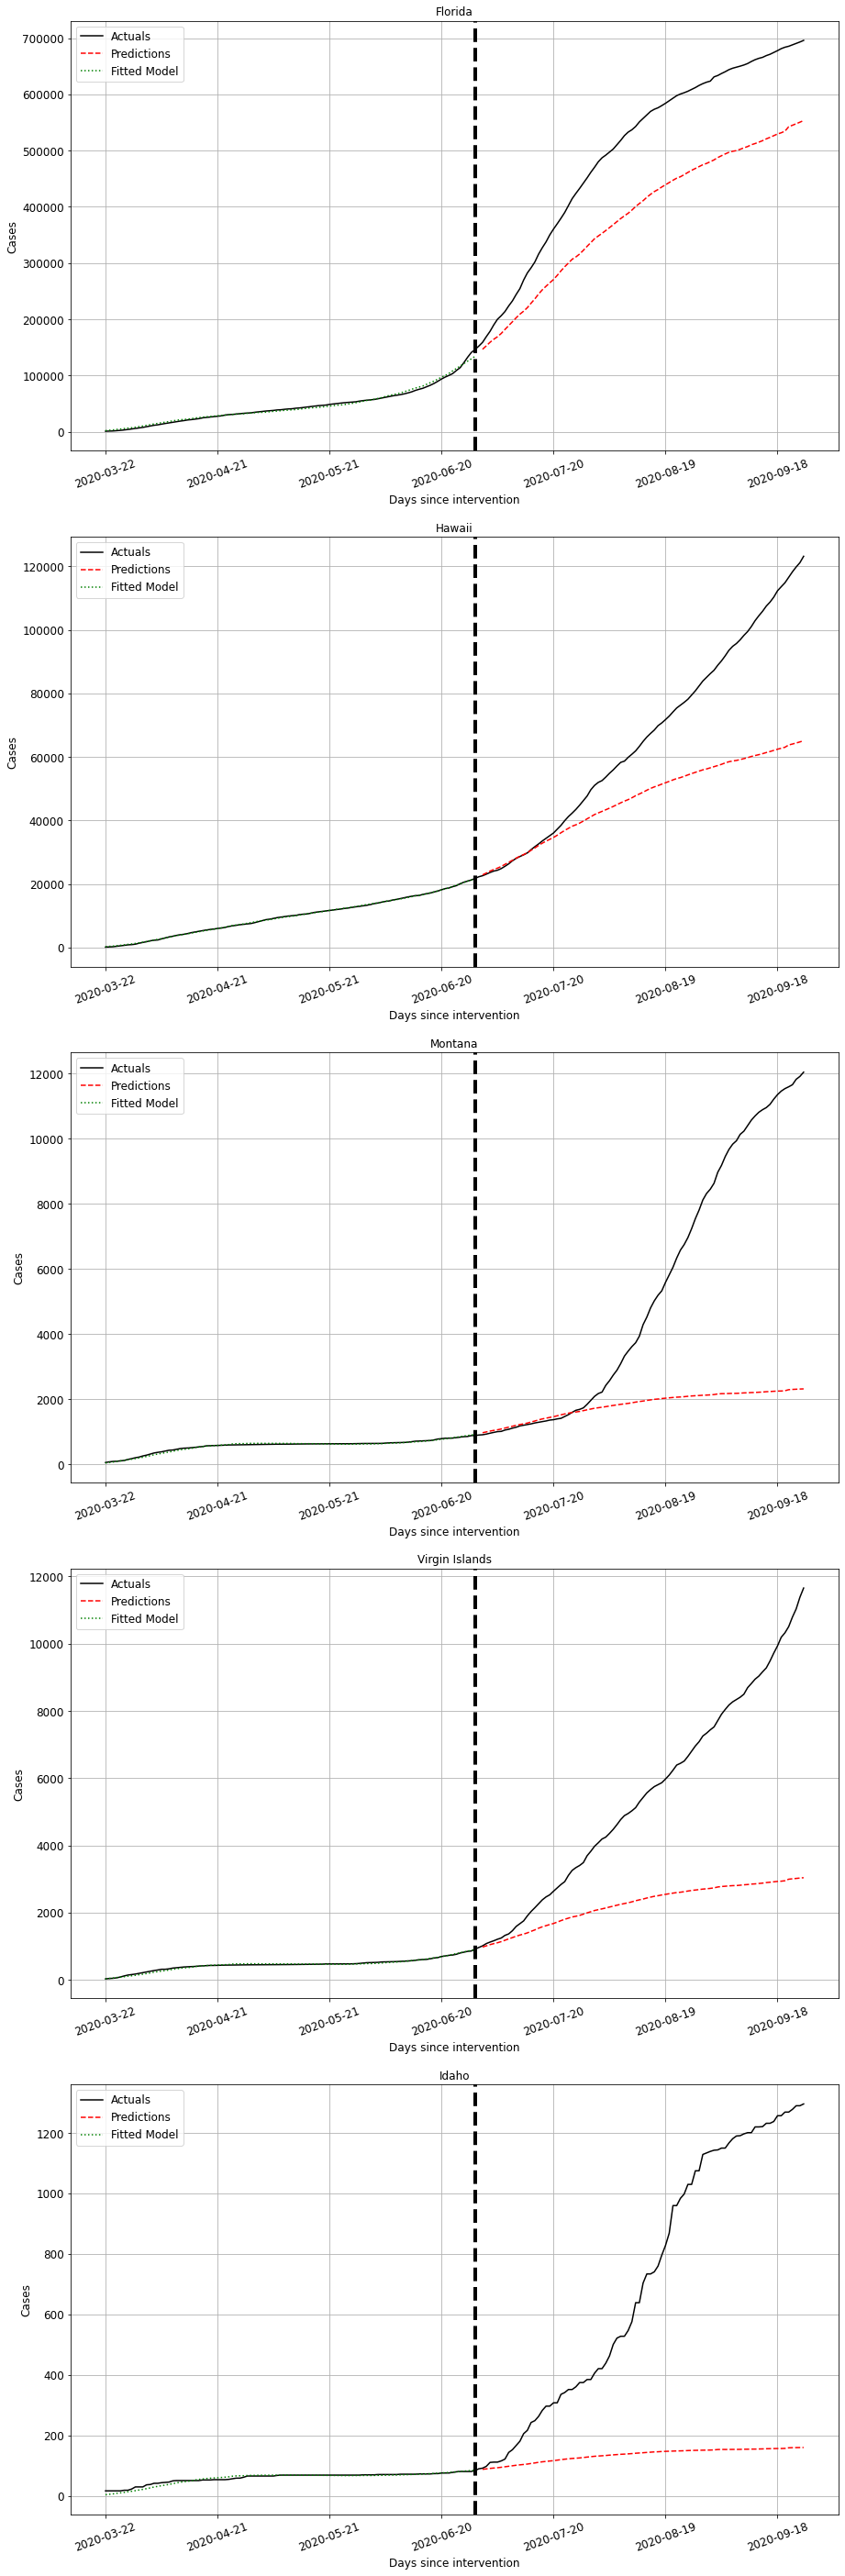

In [41]:
#Include the plot for the top 5 states with high ri score
ri_dict = model.permutation_distribution(show_graph = False, plot_models = 5)

In [38]:
#the output of the function returns a all the ri score for the target states and states in the donors 
ri_dict

{'Florida': 1771.0820151636244,
 'Alabama': 28.971912224155222,
 'Alaska': 7548.996564566611,
 'Arizona': 5817.285101837197,
 'Arkansas': 2846.741174193499,
 'California': 124.94221095973457,
 'Colorado': 17.252581759511127,
 'Connecticut': 10.620382401500603,
 'Delaware': 71.36522617694618,
 'District of Columbia': 592.5657839909468,
 'Georgia': 10250.235915562906,
 'Guam': 245.61046172059872,
 'Hawaii': 47496.04943675678,
 'Idaho': 12612.894827540664,
 'Illinois': 4.017623200957954,
 'Indiana': 339.1113156788324,
 'Iowa': 154.4350332591533,
 'Kansas': 1278.2897338798628,
 'Kentucky': 5989.441791728414,
 'Louisiana': 92.05025036394446,
 'Maine': 905.0757373831686,
 'Maryland': 747.6526964041592,
 'Massachusetts': 23.334237071361777,
 'Michigan': 82.37417491049801,
 'Minnesota': 291.00924781597286,
 'Mississippi': 1083.8351257056706,
 'Missouri': 51212.44408258065,
 'Montana': 32631.152361521166,
 'Nebraska': 388.9723325715332,
 'Nevada': 4658.430740708731,
 'New Hampshire': 1405.38085